### Muhammad Areeb Kazmi - mk07202@st.habib.edu.pk

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

#sc is the Spark Context already available at databricks, so we do not need to create it again.
#sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [0]:
products = sc.textFile("/FileStore/tables/SalesData_1_.txt")

In [0]:
products.first()

Out[3]: 'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [0]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns
Out[4]: ['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [0]:
head = products.first()
content = products.filter(lambda line: line != head)

In [0]:
content.first()

Out[6]: '680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [0]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

Out[7]: 17

# Example of RDD using Scala

In [0]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

Out[8]: [['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Two Different Code/Syntax
## Spark Dataframe syntax and SQL Table syntax

### Spark Dataframe syntax

In [0]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
spark_df.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+
only showing top 5 rows



### SQL Table syntax
First convert the original Spark Dataframe df into SQL Table and then write SQL syntax

In [0]:
# convert the original Spark Dataframe df into SQL Table
df.createOrReplaceTempView("df_table")
# write SQL query syntax
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+



## Write your solutions using Spark Dataframe syntax and Spark SQL syntax. Your output should match with the RDD output

#### 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

##### Using RDD

In [0]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

Out[9]: [('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

##### Using Spark DataFrame

In [0]:
top_15 = df.filter(df.Weight.isNotNull()) \
           .select("Name", df.Weight.cast("float").alias("Weight")) \
           .orderBy("Weight", ascending=False) \
           .limit(15)

top_15.show(15, truncate=False)


+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



##### Using Spark SQL

In [0]:
# Register the DataFrame as a temporary SQL view for query execution
df.createOrReplaceTempView("products_view")

top_products = spark.sql("""
    SELECT Name, CAST(Weight AS FLOAT) AS Weight
    FROM products_view
    WHERE Weight IS NOT NULL
    ORDER BY Weight DESC
    LIMIT 15
""")

top_products.show(truncate=False)


+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



#### 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

##### Using RDD

In [0]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

Out[16]: [('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

##### Using Spark Dataframe

In [0]:
# Select and filter rows where ProductModelID equals 5
filtered_data = df.filter(df.ProductModelID == '5') \
    .select("Name", "Color", "Size", "ProductModelID")

filtered_data.show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



##### Using Spark SQL

In [0]:
# Register the DataFrame as a temporary SQL view for querying
df.createOrReplaceTempView("product_view")

query_result = sqlContext.sql("""
    SELECT Name, Color, Size, ProductModelID
    FROM product_view
    WHERE ProductModelID = '5'
""")

query_result.show(truncate=False)


+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



#### 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

##### Using RDD

In [0]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

Out[14]: [('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

##### Using Spark Dataframe

In [0]:
# Filter rows based on color and size criteria
filtered_products = df.filter(df.Color.isin("Black", "Red", "White")) \
                      .filter(df.Size.isin("S", "M")) \
                      .select("Name", "ProductNumber")

filtered_products.show(truncate=False)

+--------------------------+-------------+
|Name                      |ProductNumber|
+--------------------------+-------------+
|Mountain Bike Socks, M    |SO-B909-M    |
|Men's Sports Shorts, S    |SH-M897-S    |
|Men's Sports Shorts, M    |SH-M897-M    |
|Women's Tights, S         |TG-W091-S    |
|Women's Tights, M         |TG-W091-M    |
|Half-Finger Gloves, S     |GL-H102-S    |
|Half-Finger Gloves, M     |GL-H102-M    |
|Full-Finger Gloves, S     |GL-F110-S    |
|Full-Finger Gloves, M     |GL-F110-M    |
|Women's Mountain Shorts, S|SH-W890-S    |
|Women's Mountain Shorts, M|SH-W890-M    |
|Racing Socks, M           |SO-R809-M    |
+--------------------------+-------------+



##### Using Spark SQL

In [0]:
# Register DataFrame as a temporary SQL view
df.createOrReplaceTempView("filtered_products")

query_output = spark.sql("""
    SELECT Name, ProductNumber
    FROM filtered_products
    WHERE Color IN ('Black', 'Red', 'White') AND Size IN ('S', 'M')
""")

query_output.show(truncate=False)


+--------------------------+-------------+
|Name                      |ProductNumber|
+--------------------------+-------------+
|Mountain Bike Socks, M    |SO-B909-M    |
|Men's Sports Shorts, S    |SH-M897-S    |
|Men's Sports Shorts, M    |SH-M897-M    |
|Women's Tights, S         |TG-W091-S    |
|Women's Tights, M         |TG-W091-M    |
|Half-Finger Gloves, S     |GL-H102-S    |
|Half-Finger Gloves, M     |GL-H102-M    |
|Full-Finger Gloves, S     |GL-F110-S    |
|Full-Finger Gloves, M     |GL-F110-M    |
|Women's Mountain Shorts, S|SH-W890-S    |
|Women's Mountain Shorts, M|SH-W890-M    |
|Racing Socks, M           |SO-R809-M    |
+--------------------------+-------------+



#### 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

##### Using RDD

In [0]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

Out[15]: [('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

##### Using Spark Dataframe

In [0]:
# Filter and retrieve the top 15 products starting with 'BK'
bk_top_products = df.filter(df.ProductNumber.startswith("BK")) \
    .select("Name", "ProductNumber", "Color", df.ListPrice.cast("float").alias("Price")) \
    .orderBy("Price", ascending=False) \
    .limit(15)

bk_top_products.show(15, truncate=False)

+-----------------------+-------------+------+-------+
|Name                   |ProductNumber|Color |Price  |
+-----------------------+-------------+------+-------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27|
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27|
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27|
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27|
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27|
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99|
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99|
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99|
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99|
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99|
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99|
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99|
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99|
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35|
|Road-250 Red, 48       |BK-R89R-48   |Red   |2443.35|
+---------

##### Using Spark SQL

In [0]:
# Register DataFrame as a temporary SQL view
df.createOrReplaceTempView("products_view")

top_bk_products = spark.sql("""
    SELECT Name, ProductNumber, Color, CAST(ListPrice AS FLOAT) AS Price
    FROM products_view
    WHERE ProductNumber LIKE 'BK%'
    ORDER BY Price DESC
    LIMIT 15
""")

top_bk_products.show(truncate=False)

+-----------------------+-------------+------+-------+
|Name                   |ProductNumber|Color |Price  |
+-----------------------+-------------+------+-------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27|
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27|
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27|
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27|
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27|
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99|
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99|
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99|
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99|
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99|
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99|
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99|
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99|
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35|
|Road-250 Red, 48       |BK-R89R-48   |Red   |2443.35|
+---------

#### 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

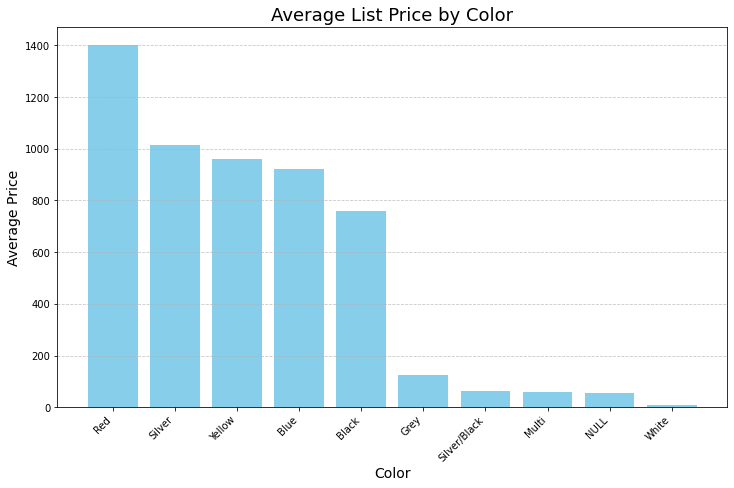

In [0]:
# Compute the average ListPrice for each color
color_avg_price = df.groupBy("Color").agg(F.avg(F.col("ListPrice").cast("float")).alias("AveragePrice"))

color_avg_price_df = color_avg_price.toPandas()

# Sort by average price in descending order
color_avg_price_df = color_avg_price_df.sort_values("AveragePrice", ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(color_avg_price_df["Color"], color_avg_price_df["AveragePrice"], color='skyblue')
plt.title("Average List Price by Color", fontsize=18)
plt.xlabel("Color", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Observation:
- **Red** and **Silver** colors are associated with the highest average prices, indicating they may be linked to premium or high-demand products.
- **Yellow**, **Blue**, and **Black** colors have moderate prices, likely reflecting their widespread use across various product types.
- **Gray** occupies a middle ground in terms of pricing.
- **Silver/Black**, **Multi**, and **White** colors are associated with lower average prices, possibly indicating more affordable or mass-market items.
- NULL values may represent missing data and should be examined as they could affect the analysis.

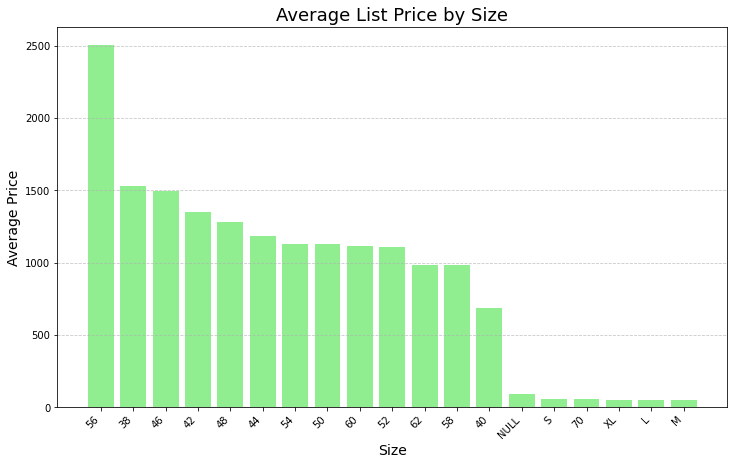

In [0]:
# Compute the average ListPrice for each size
size_avg_price = df.groupBy("Size").agg(F.avg(F.col("ListPrice").cast("float")).alias("AveragePrice"))

size_avg_price_df = size_avg_price.toPandas()

# Sort by average price in descending order
size_avg_price_df = size_avg_price_df.sort_values("AveragePrice", ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(size_avg_price_df["Size"], size_avg_price_df["AveragePrice"], color='lightgreen')
plt.title("Average List Price by Size", fontsize=18)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Some of the insights are:
- The **Average List Price per Size** chart indicates that larger sizes, such as **56**, **58**, and **60**, generally have higher average prices, likely due to higher demand or increased production costs.
- Smaller sizes like **S**, **M**, **L**, and **XL** are priced lower on average, reflecting their more widespread availability and potentially lower manufacturing expenses.
- **NULL** values suggest missing data, which may influence the accuracy of the analysis and its conclusions.
- This pricing pattern offers valuable insights for businesses, guiding pricing strategies and inventory decisions. Larger sizes, often associated with higher demand or limited availability, could justify premium pricing, while smaller sizes can be priced more competitively to appeal to a broader customer base.

#### 6. Visualize Total Count per Size. Discuss/Explain your results.

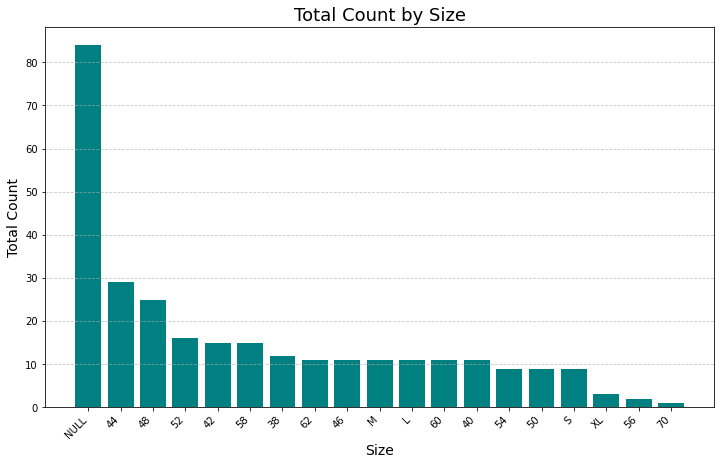

In [0]:
# Group by Size and calculate the total count of each size
count_by_size = df.groupBy("Size").agg(F.count("*").alias("SizeCount"))

count_by_size_df = count_by_size.toPandas()
count_by_size_df = count_by_size_df.sort_values("SizeCount", ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(count_by_size_df["Size"], count_by_size_df["SizeCount"], color='teal')
plt.title("Total Count by Size", fontsize=18)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Total Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Observation:
- The **Total Count per Size** chart reveals a clear distribution pattern in the dataset.
- A significant portion of the data consists of **missing values ("NULL")**, which dominate the chart, indicating potential issues with incomplete records.
- After the NULL category, sizes **44** and **48** stand out with counts between 20 and 30, suggesting moderate demand or stock for these sizes.
- Other sizes, such as **52**, **46**, **50**, and smaller sizes like **5**, have lower frequencies, implying they are less common in the dataset.
- The distribution declines sharply after the prominent sizes, with fewer items in the remaining sizes, including **M**, **L**, and **70**, which show minimal counts.
- This pattern highlights the dominance of a few key size categories and the scarcity of others.
- It suggests that efforts should focus on cleaning the data to address the missing values.

# Using Machine Learning Library (For Practice)

In [0]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

+-------+----+---------+
|Weight |Size|ListPrice|
+-------+----+---------+
|1016.04|58.0|1431.5   |
|1016.04|58.0|1431.5   |
|null   |null|34.99    |
|null   |null|34.99    |
|null   |null|9.5      |
+-------+----+---------+
only showing top 5 rows



In [0]:
dfall = dfall.na.drop("any")

In [0]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [0]:
data_2 = assembler.transform(dfall)

In [0]:
data_2.show()

+-------+----+---------+--------------------+
| Weight|Size|ListPrice|            features|
+-------+----+---------+--------------------+
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1043.26|62.0|   1431.5|[1043.26000976562...|
| 961.61|44.0|   1431.5|[961.609985351562...|
| 979.75|48.0|   1431.5|       [979.75,48.0]|
|  997.9|52.0|   1431.5|[997.900024414062...|
|1016.04|56.0|   1431.5|[1016.03997802734...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1052.33|44.0|   337.22|[1052.32995605468...|
|1070.47|48.0|   337.22|[1070.46997070312...|
|1088.62|52.0|   337.22|[1088.61999511718...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1006.97|44.0|   594.83|[1006.96997070312...|
|1025.11|48.0|   594.83|[1025.10998535156...|
|1043.26|52.0|   594.83|[1043.2600

In [0]:
from pyspark.ml.regression import LinearRegression

In [0]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [0]:
model = algo.fit(data_2)

In [0]:
evaluation_summary = model.evaluate(data_2)

In [0]:
evaluation_summary.rootMeanSquaredError

Out[31]: 83.01687079582804

In [0]:
evaluation_summary.r2

Out[32]: 0.9916704878125818